In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from strinng.generators import CrossEntropyLoss, Flatten, Linear, add_residual, add_loss
from strinng.gui.mpldraw import MplArtist

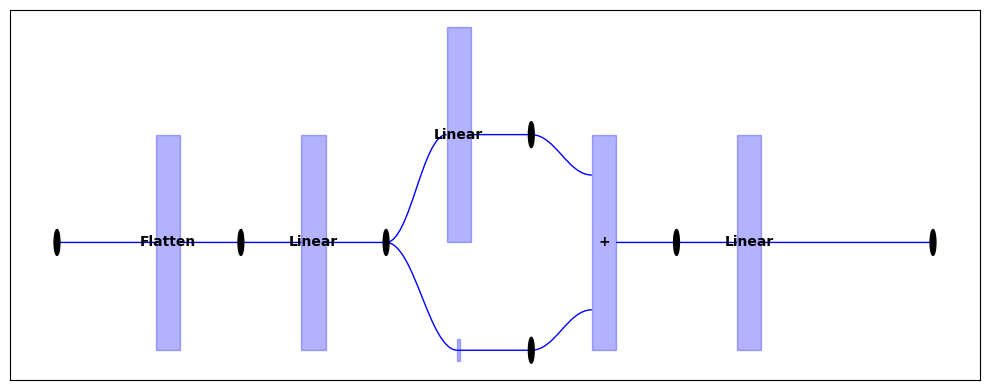

In [4]:
network = Flatten() >> Linear(28*28, 512) >> add_residual(Linear(512, 512)) >> Linear(512, 10)
MplArtist(network).draw(figsize=(10, 4))

In [22]:
from strinng.match import match_rule
from strinng.rewrite import dpo
from strinng.rule import Rule

f = Flatten()
l = Linear(12, 12)
rule = Rule(f, l, 'f2l', True)
rewritten = None
for m1 in match_rule(rule, network):
    for m2 in dpo(rule, m1):
        rewritten = m2.codomain
        break

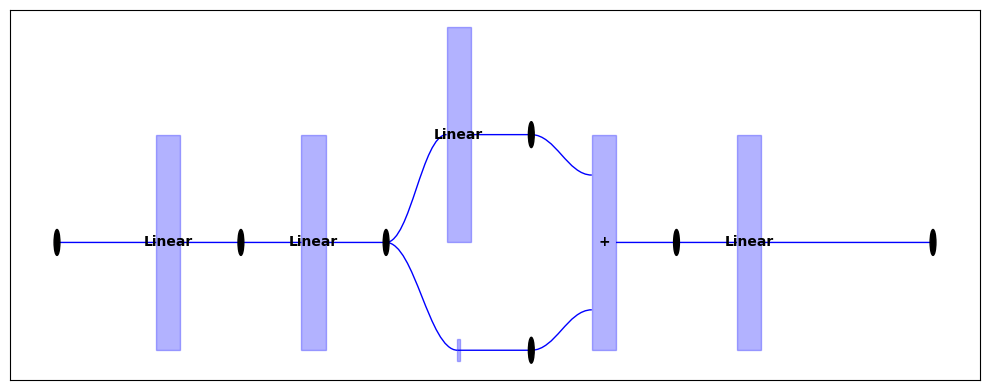

In [23]:
MplArtist(rewritten).draw(figsize=(10, 4))

In [26]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [27]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

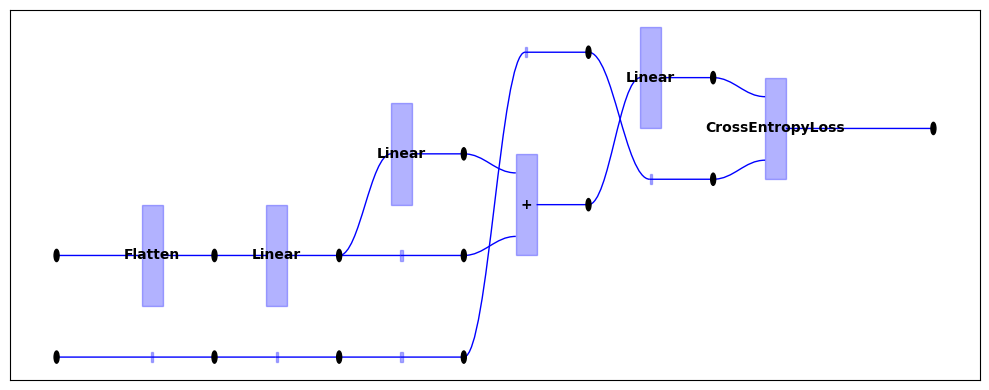

In [28]:
network = add_loss(network, CrossEntropyLoss())
MplArtist(network).draw(figsize=(10, 4))

In [33]:
def train_loop(dataloader, model, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        loss = model(X, y)[0]
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [34]:
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)
train_loop(train_dataloader, network, optimizer)

loss: 2.302806  [   64/60000]
loss: 2.161106  [ 6464/60000]
loss: 1.981391  [12864/60000]
loss: 1.912922  [19264/60000]
loss: 1.715155  [25664/60000]
loss: 1.611776  [32064/60000]
loss: 1.552517  [38464/60000]
loss: 1.426399  [44864/60000]
loss: 1.439593  [51264/60000]
loss: 1.272007  [57664/60000]
